# Car Resale Price Prediction using Scikit-Learn Testing

In [2]:
import pandas as pd

df = pd.read_csv("car_web_scraped_dataset.csv")

This is my first ever Notebook!!
**I used these notebooks as reference while writing this notebook: [Ref1](https://www.kaggle.com/code/ayaz11/car-price-prediction#3.-EDA), [Ref2](https://www.kaggle.com/code/umutakba/car-prices-estimation)**

# Data Cleaning & Feature Engineering

In [3]:
# drop any duplicate rows in the dataframe
df_copy = df.copy().drop_duplicates()

# first strip the $ sign and then replace all occurances of a comma
# then convert the value to a integer
cleaned_price = [int(str(value).strip("$").replace(",", "")) for value in df_copy['price'].values]

# print(cleaned_price)


We can see above that the price has been cleaned

Now let's clean the miles!

In [4]:
# In a similar fashion we clean the miles variable by replace commas and the word "miles", then stripping an trailing or leading spaces
# finally converting to an intiger
miles = [ int(str(m).replace("miles", "").replace(",", "").strip()) for m in df_copy["miles"].values ]

# print(miles)
len(miles)

2312

Now that our miles variable is clean, let's move onto to **name, color and condition** as these require splitting them into new coloumns:

In [5]:
temp_name = df_copy["name"].copy()

# split the column into 2 parts with the first being the make and the second being the model
temp_name = [str(name).split(" ", maxsplit=1) for name in temp_name.values]

# make of the car
make = [arr[0] for arr in temp_name]

# print(make)
len(make)

type(make[0])

str

In [6]:
# model of the car
model = [arr[1] for arr in temp_name]

# print(model)
len(model)

2312

With our name variable clean let's move onto **color**.

In [7]:
# Let's split this into 2 columns: exterior-color and interior-color
colors = [ str(color).split(",") for color in df_copy["color"].values ]

# print(colors)
len(colors)

2312

In [8]:
# Let's replace the word exterior and strip the string
exterior_color = [ str(color[0]).replace("exterior", "").strip() for color in colors ]

# print(exterior_color)
len(exterior_color)

2312

In [9]:
# Let's replace the word interior and strip the string
interior_color = [ str(color[1]).replace("interior", "").strip() for color in colors ]

# print(interior_color)
len(interior_color)

2312

Finally, let's deal with the **condition** variable that tells us important information about the **number of accidents** and the **amount of owners**

In [10]:
conditions = [ str(condition).split(",") for condition in df_copy['condition'].values ]

# replace the words in the column and make them an intiger
# we replace "No accidents reported" with a 0
accidents = [ int(str(condition[0]).replace("No", "0").replace("accidents reported", "").replace("accident reported", "").strip()) for condition in conditions]

# print(accidents)
len(accidents)

2312

In [11]:
# replace the words in the column and make them an intiger
owners = [ int(str(condition[1]).replace("Owners", "").replace("Owner", "").strip()) for condition in conditions]

# print(owners)
len(owners)

2312

In [12]:
# This is just to make sure that all the lists are the same size in order to make the dataframe
print(
    len(make), 
    len(model),
    len(df_copy['year'].copy()),
    len(miles),
    len(exterior_color),
    len(interior_color),
    len(accidents),
    len(owners),
    len(cleaned_price)
)

2312 2312 2312 2312 2312 2312 2312 2312 2312


Now that we have cleaned all our columns, lets put them together into a clean dataframe!

In [13]:
# make the dataframe using our cleaned lists
df_clean = pd.DataFrame( 
    {
        "make": make,
        "model": model,
        "year": [int(yr) for yr in df_copy['year'].copy().values],
        "miles": miles,
        "exterior-color": exterior_color,
        "interior-color": interior_color,
        "accidents-reported": accidents,
        "num-of-owners": owners,
        "price": cleaned_price
    }
)

df_clean

,make,model,year,miles,exterior-color,interior-color,accidents-reported,num-of-owners,price
0,Kia,Forte,2022,41406,Gray,Black,0,1,15988
1,Chevrolet,Silverado 1500,2021,15138,White,Black,1,1,38008
2,Toyota,RAV4,2022,32879,Silver,Unknown,0,1,24988
3,Honda,Civic,2020,37190,Blue,Black,0,1,18998
4,Honda,Civic,2020,27496,Black,Black,0,1,19498
...,...,...,...,...,...,...,...,...,...
2307,Ford,Escape,2013,98601,Silver,Unknown,2,3,8995
2308,Mercedes-Benz,R-Class,2009,120694,Black,Black,1,3,9495
2309,Mercedes-Benz,GLC,2022,27894,Gray,Gray,0,2,29999
2310,Honda,CR-V,2021,50220,Gray,Unknown,0,1,22992


A look at all the unique values in the dataset:

In [14]:
print(
    "make: {}".format(df_clean['make'].unique()),
    "model: {}".format(df_clean['model'].unique()),
    "year: {}".format(df_clean['year'].unique()),
    "miles: {}".format(df_clean['miles'].aggregate(func=['mean'])),
    "exterior-color: {}".format(df_clean['exterior-color'].unique()),
    "interior-color: {}".format(df_clean['interior-color'].unique()),
    "accidents-reported: {}".format(df_clean['accidents-reported'].unique()),
    "price: {}".format(df_clean['price'].aggregate(func=['mean'])),
    sep="\n\n"
)

make: ['Kia' 'Chevrolet' 'Toyota' 'Honda' 'Mercedes-Benz' 'BMW' 'Jeep' 'Porsche'
 'Buick' 'Nissan' 'Chrysler' 'Volkswagen' 'Land' 'Dodge' 'Ford' 'INFINITI'
 'Volvo' 'Mitsubishi' 'Lexus' 'Hyundai' 'Mazda' 'Acura' 'Maserati'
 'Subaru' 'Audi' 'Jaguar' 'GMC' 'Cadillac' 'Ram' 'Alfa' 'FIAT' 'Lincoln'
 'Aston' 'MINI' 'Genesis' 'Karma' 'Scion' 'McLaren' 'Rolls-Royce'
 'Bentley' 'Pontiac' 'Saturn']

model: ['Forte' 'Silverado 1500' 'RAV4' 'Civic' 'Accord' 'GLC' '5 Series'
 'Wrangler' 'Macan' 'Cascada' '3 Series' 'Grand Cherokee' 'C-Class'
 'Cayenne' 'Odyssey' '7 Series' 'K5' 'Kicks' 'CR-V' 'Pacifica' 'Tiguan'
 'Sentra' 'Camry' 'Malibu' 'Volt' 'Rover Range Rover Sport' 'Highlander'
 'Optima' 'Charger' 'Corolla' 'Tacoma' '4Runner' 'Mustang' 'F-150' 'Pilot'
 'Rogue Sport' 'QX60' 'XC60' 'Explorer' 'Equinox' 'GLE' 'S-Class' 'S90'
 'X3' 'GLS' 'Bronco Sport' 'Outlander Sport' 'XC90' 'RX' 'E-Class' 'Versa'
 'Edge' '4 Series' 'Sonata' 'X4 M' '300' 'Fusion' 'Mazda3' 'GLA' 'LX'
 'Blazer' 'Altima' 'CX-9' '

As we can see above our dataset is now clean and ready for some data analysis!

# Data Analysis

In [15]:
df_clean.describe()

,year,miles,accidents-reported,num-of-owners,price
count,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000
mean,2018.873702,49896.590398,0.281142,1.504325,25841.419983
std,3.466794,36287.386865,0.593947,0.852607,13880.328572
min,2000.000000,25.000000,0.000000,0.000000,4395.000000
25%,2017.000000,23590.250000,0.000000,1.000000,17991.000000
50%,2020.000000,40703.000000,0.000000,1.000000,22999.000000
75%,2021.000000,69360.250000,0.000000,2.000000,30999.250000
max,2024.000000,307292.000000,5.000000,8.000000,252900.000000


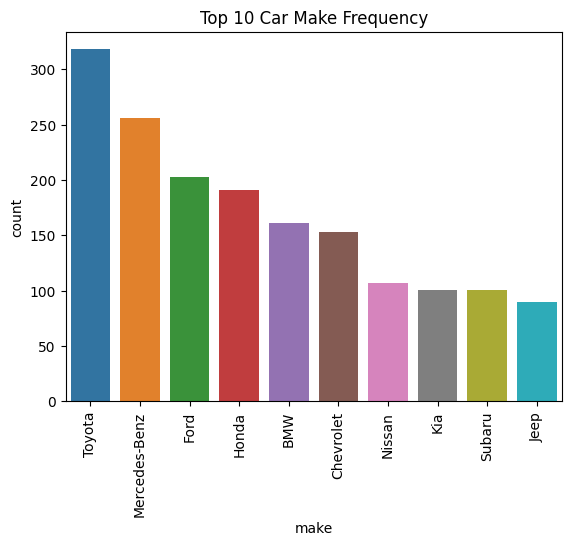

In [16]:
# Let's import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    x="make", y="count", 
    data=df_clean['make'].value_counts().to_frame().head(10),
    hue="make"
)

plt.xticks(rotation=90);
plt.title("Top 10 Car Make Frequency");


Let's try to find out which variable has the **most** impact on the **price**!

In [17]:
df_clean

,make,model,year,miles,exterior-color,interior-color,accidents-reported,num-of-owners,price
0,Kia,Forte,2022,41406,Gray,Black,0,1,15988
1,Chevrolet,Silverado 1500,2021,15138,White,Black,1,1,38008
2,Toyota,RAV4,2022,32879,Silver,Unknown,0,1,24988
3,Honda,Civic,2020,37190,Blue,Black,0,1,18998
4,Honda,Civic,2020,27496,Black,Black,0,1,19498
...,...,...,...,...,...,...,...,...,...
2307,Ford,Escape,2013,98601,Silver,Unknown,2,3,8995
2308,Mercedes-Benz,R-Class,2009,120694,Black,Black,1,3,9495
2309,Mercedes-Benz,GLC,2022,27894,Gray,Gray,0,2,29999
2310,Honda,CR-V,2021,50220,Gray,Unknown,0,1,22992


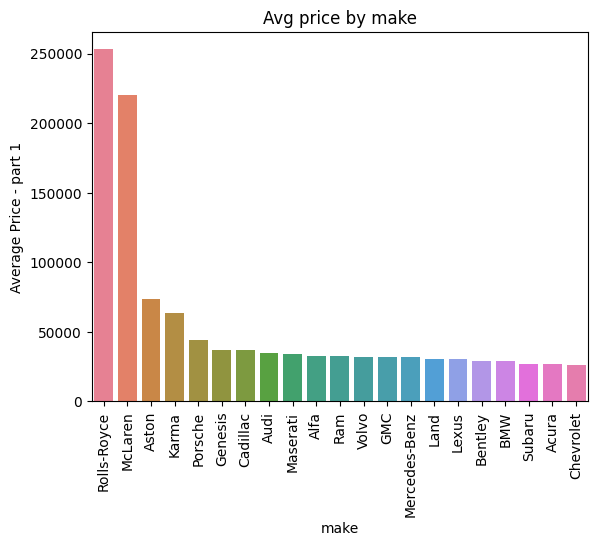

In [18]:
# a seaborn bargraph with each bar being a car make and the y-axis representing the avg price of a car of that make 
sns.barplot(
    x='make', y='price', 
    data=df_clean.groupby('make')['price'].mean().to_frame().sort_values(by='price', ascending=False).head(21),
    hue="make"
)


plt.title("Avg price by make");
plt.xticks(rotation=90);
plt.ylabel("Average Price - part 1");

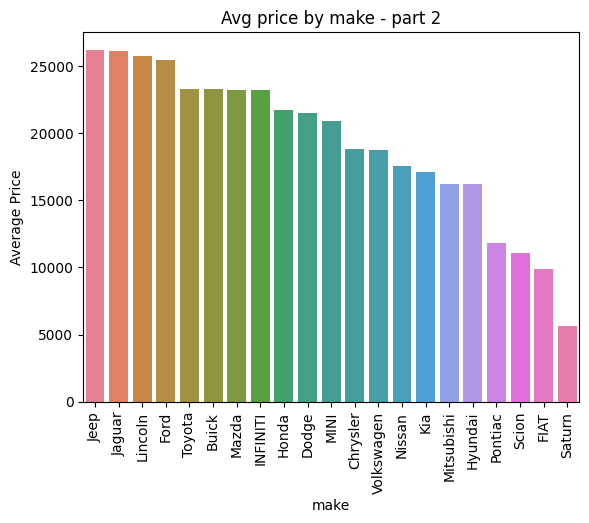

In [19]:
# a seaborn bargraph with each bar being a car make and the y-axis representing the avg price of a car of that make
sns.barplot(
    x='make', y='price',
    data=df_clean.groupby('make')['price'].mean().to_frame().sort_values(by='price', ascending=False).tail(21),
    hue="make",
    
)
plt.title("Avg price by make - part 2");
plt.xticks(rotation=90);
plt.ylabel("Average Price");

Now let's see if there's any correlation between accidents reported and number of previous owners!

But before we do that, let's first remove some outliers.

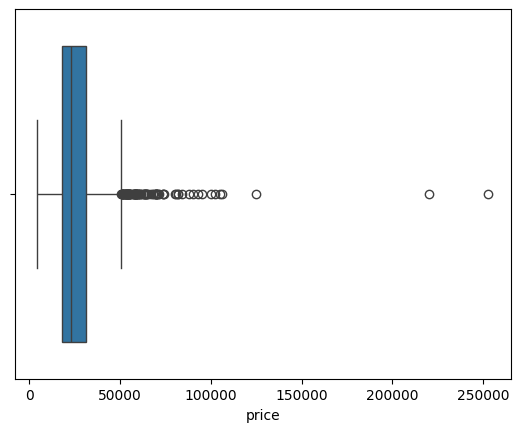

count      2312.000000
mean      25841.419983
std       13880.328572
min        4395.000000
25%       17991.000000
50%       22999.000000
75%       30999.250000
max      252900.000000
Name: price, dtype: float64


In [20]:
# simple seaborn box plot by using the price as datapoints
box = sns.boxplot(
    x=df_clean["price"].sort_values()
)

plt.show()

print(df_clean["price"].sort_values().describe())

We can see above that the **1st quartile** is **17991** and **3rd quartile is 22999**.

Let's use these to remove any outliers.

Here's a graph before removing them:

Text(0.5, 1.0, 'mean price by accidents-reported')

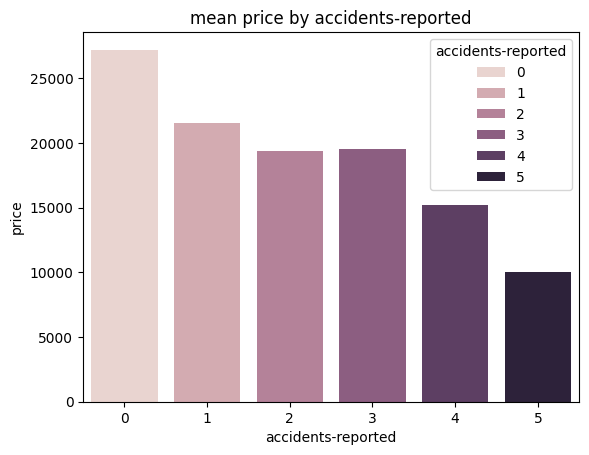

In [21]:
# grouby accidents-reported and aggregate price using mean
sns.barplot(
    x='accidents-reported', y='price',
    data=df_clean.groupby('accidents-reported')['price'].mean().to_frame(),
    hue="accidents-reported"
)

plt.title("mean price by accidents-reported")

Here we can easily notice a correlation between the number of accidents reported and the mean price of the car, but let's look at it again
after removing outliers.

In [22]:
# function that calculates the lower and upper bounds for finding outliers using the Inter Quartile Range (IQR)
def return_lower_upper_bounds(q1: float, q3: float):
    IQR = q3 - q1
    lower = q1 - (1.5 * IQR)
    upper = q3 + (1.5 * IQR)
    return lower, upper

# make a copy of the dataframe
df_removed_outliers_by_price = df_clean.copy()

# use the method we defined previously to remove outliers
lower_bound, upper_bound = return_lower_upper_bounds(q1=17991, q3=30999.25)

# find the indexes of the rows that have price outliers
index_q1 = df_removed_outliers_by_price[ (df_removed_outliers_by_price['price'] < lower_bound) ].index
index_q3 = df_removed_outliers_by_price[ (df_removed_outliers_by_price['price'] > upper_bound) ].index

# remove them from our dataframe
df_removed_outliers_by_price.drop(index=index_q1, inplace=True)
df_removed_outliers_by_price.drop(index=index_q3, inplace=True)

df_removed_outliers_by_price

,make,model,year,miles,exterior-color,interior-color,accidents-reported,num-of-owners,price
0,Kia,Forte,2022,41406,Gray,Black,0,1,15988
1,Chevrolet,Silverado 1500,2021,15138,White,Black,1,1,38008
2,Toyota,RAV4,2022,32879,Silver,Unknown,0,1,24988
3,Honda,Civic,2020,37190,Blue,Black,0,1,18998
4,Honda,Civic,2020,27496,Black,Black,0,1,19498
...,...,...,...,...,...,...,...,...,...
2307,Ford,Escape,2013,98601,Silver,Unknown,2,3,8995
2308,Mercedes-Benz,R-Class,2009,120694,Black,Black,1,3,9495
2309,Mercedes-Benz,GLC,2022,27894,Gray,Gray,0,2,29999
2310,Honda,CR-V,2021,50220,Gray,Unknown,0,1,22992


<Axes: xlabel='price'>

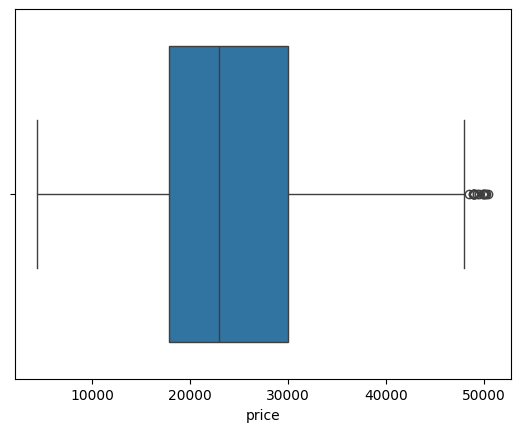

In [23]:
sns.boxplot(x=df_removed_outliers_by_price['price'].sort_values())

Above we can see that we have successfully **removed** the **outliers** (I think some are still there because seaborn calculates them differently but we have removed the **extreme** ones so we're safe)! 

Now, let's make the bargraph again.

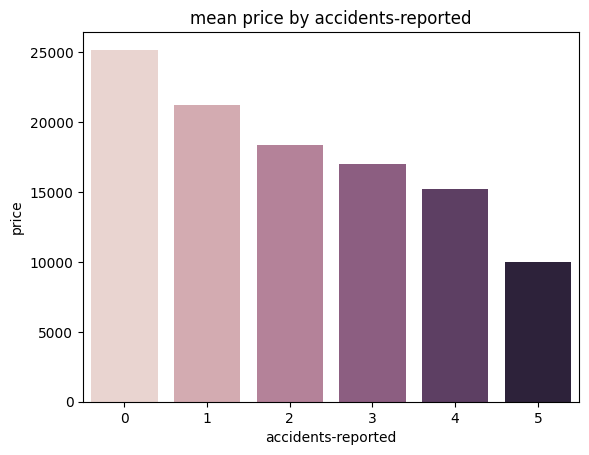

In [24]:

sns.barplot(
    x='accidents-reported', y='price', 
    data=df_removed_outliers_by_price.groupby('accidents-reported')['price'].mean().to_frame(),
    hue='accidents-reported',
    legend=False
)
plt.title("mean price by accidents-reported");


Now we can observe a more **direct correlation** between **accidents-reported** and the **mean** price in the above bargraph.

Naturally, the **lower**<span>&darr;</san> amount of **accidents reported** for a car, the **more**<span>&uarr;</san> the value as there's **less damaged** that has been done to the car.

Let's do this for the owners variable as well!

Again, this is **before** removing the outliers:

,make,model,year,miles,exterior-color,interior-color,accidents-reported,num-of-owners,price
0,Kia,Forte,2022,41406,Gray,Black,0,1,15988
1,Chevrolet,Silverado 1500,2021,15138,White,Black,1,1,38008
2,Toyota,RAV4,2022,32879,Silver,Unknown,0,1,24988
3,Honda,Civic,2020,37190,Blue,Black,0,1,18998
4,Honda,Civic,2020,27496,Black,Black,0,1,19498
...,...,...,...,...,...,...,...,...,...
2307,Ford,Escape,2013,98601,Silver,Unknown,2,3,8995
2308,Mercedes-Benz,R-Class,2009,120694,Black,Black,1,3,9495
2309,Mercedes-Benz,GLC,2022,27894,Gray,Gray,0,2,29999
2310,Honda,CR-V,2021,50220,Gray,Unknown,0,1,22992


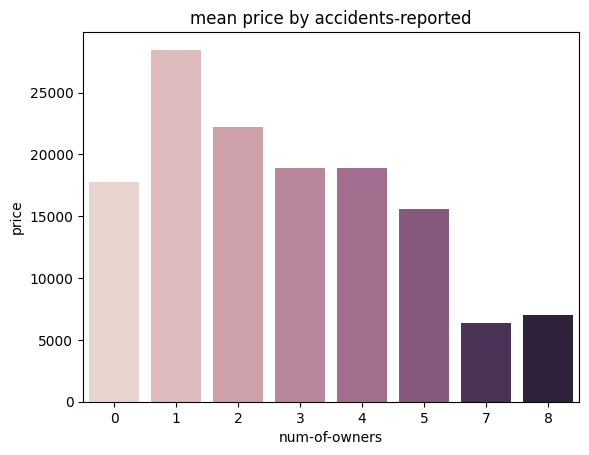

In [25]:
# grouby accidents-reported and aggregate price using mean
sns.barplot(
    x='num-of-owners', y='price', 
    data=df_clean.groupby('num-of-owners')['price'].mean().to_frame(),
    hue='num-of-owners',
    legend=False
)

# set the plot's title
plt.title("mean price by accidents-reported");

df_clean

This is **after** removing the outliers:

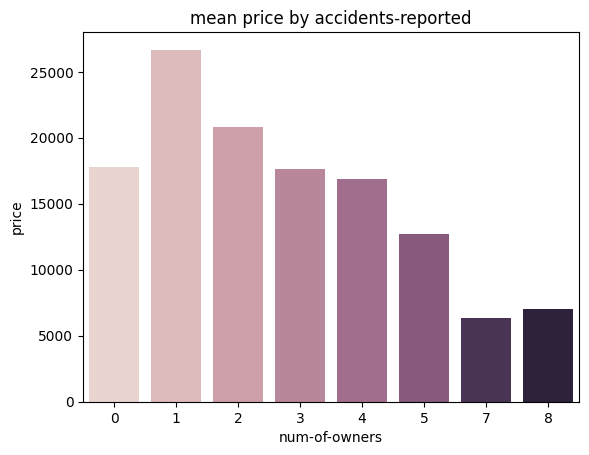

In [26]:
sns.barplot(
    x='num-of-owners', y='price', 
    data=df_removed_outliers_by_price.groupby('num-of-owners')['price'].mean().to_frame(),
    hue="num-of-owners",
    legend=False
)

plt.title("mean price by accidents-reported");

Seems like the outliers had **little** to no effect on the number of previous owners!

It is also worth noticing that some of these cars have 0 previous owners which does not make sense because this data is off of a dataset that claims that these are used car listings.

Let's find out how many of these cars have 0 owners.

In [27]:
print(df_clean['num-of-owners'].value_counts()[0])

10


Seems like we only have 10 rows that have 0 as the number of previous owners. So let's drop those rows to maintain our datasets integrity.

In [28]:
# grab the indices of the rows that have 0 as the number of previous owners
index_of_new_cars = df_clean[(df_clean['num-of-owners'] == 0)].index

df_clean.drop(index=index_of_new_cars, inplace=True)

temp  = list(df_clean['num-of-owners'].unique())
temp.sort()
print(temp)

[1, 2, 3, 4, 5, 7, 8]


As we can see, there's **no 0** in the above list because we have **eliminated** it.

Let's also drop them from the no outliers dataframe:

In [29]:
index_of_new_cars = df_removed_outliers_by_price[(df_removed_outliers_by_price['num-of-owners'] == 0)].index

df_removed_outliers_by_price.drop(index=index_of_new_cars, inplace=True)

Now let's take a look the most **important** relationship which is between **miles** and **price**!

Let's visualize this using a scatter plot!!

<Axes: xlabel='miles', ylabel='price'>

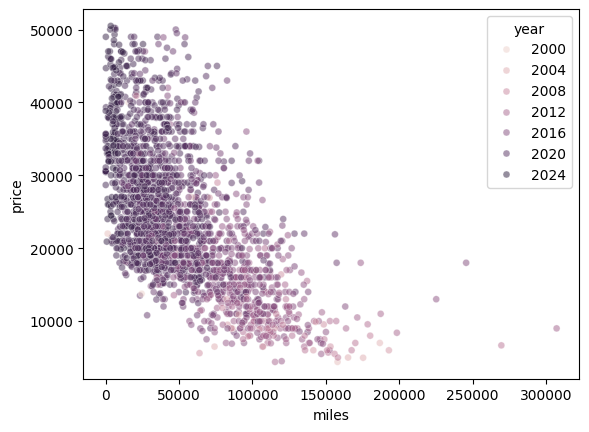

In [30]:
sns.scatterplot(
    x='miles', y='price', 
    data=df_removed_outliers_by_price, hue='year' , s=25, alpha=0.5
)

The plot above is too dense and hard to read, so I decided to make the figure larger and lengthen the yticks.

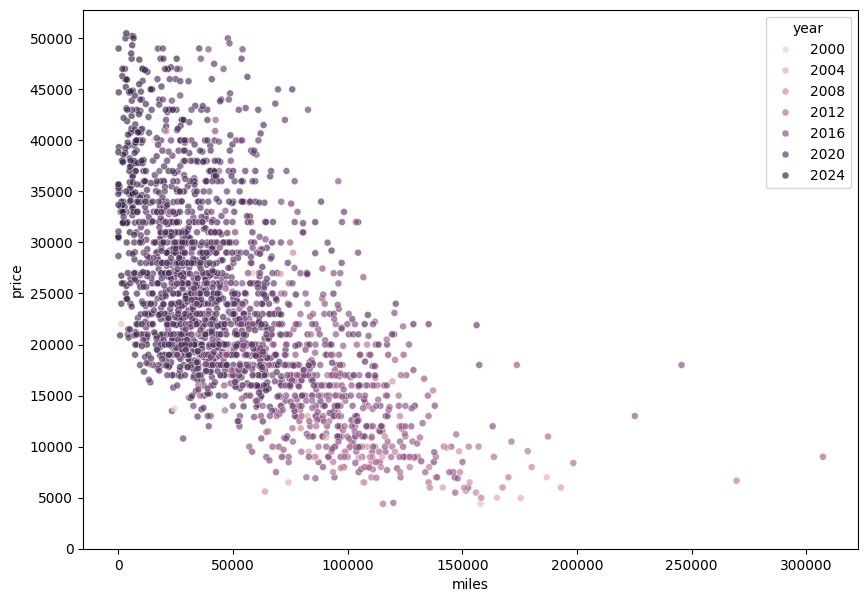

In [31]:
# set figure size
plt.figure(figsize=(10,7))
# scatter plot of miles vs price with hue to the year variable, "s" param is the size of the dots & alpha is the opacity
sns.scatterplot(
    x='miles', y='price', data=df_removed_outliers_by_price, 
    hue='year', s=25, alpha=0.65
).set_yticks(range(0, 55000, 5000)) # set yticks range by giving it a list spaced by 5000

From the above plot, we can conclude that **newer** cars are **driven less**, hence the **higher price**<span>&uarr;</san>. And **older cars** are driven more, because well they're old, so they **cost less**<span>&darr;</san>.

In the middle of scatter plot, however, we can see a fair mix of both **old** and **new** cars. This is also where our mean price is.

<Figure size 1000x1000 with 0 Axes>

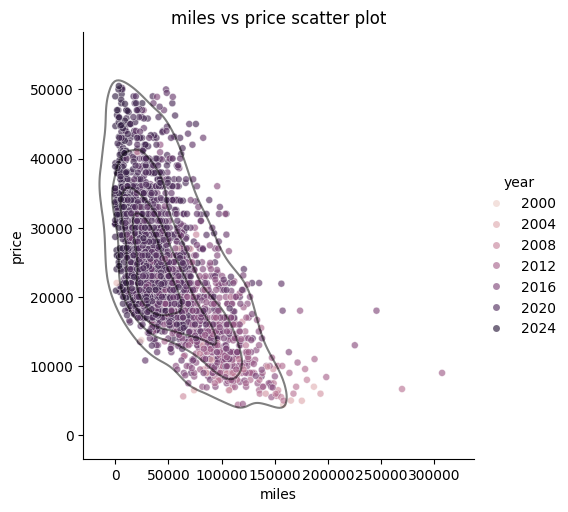

In [32]:
plt.figure(figsize=(10,10))
# scatter plot and then a density plot over it
# hue is to give color by a variable, and alpha is opacity of the points
sns.relplot(
    x='miles', y='price', data=df_removed_outliers_by_price, 
    hue='year' , s=25, alpha=0.65
) # scatter plot

# levels is the amount of lines in the density plot
sns.kdeplot(
    x='miles', y='price', data=df_removed_outliers_by_price, 
    alpha=0.5, levels=5, color="black"
) # density plot over scatter plot

plt.title("miles vs price scatter plot");

Finally, let's take quick look at **exterior** and **interior** color prices.

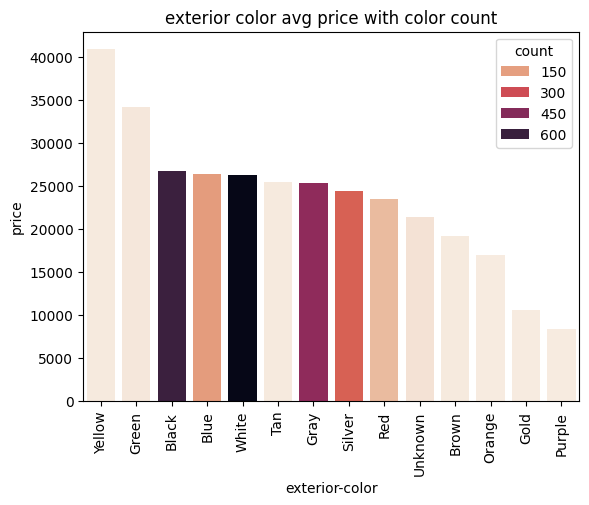

In [33]:
ex_df = df_clean.groupby('exterior-color')['price'].mean().sort_values(ascending=False).to_frame().sort_index()
# add the count column
ex_df['count'] = df_clean['exterior-color'].value_counts().to_frame().sort_index()

sns.barplot(
    x="exterior-color", y="price", 
    data=ex_df.sort_values(by="price", ascending=False), 
    # rocket_r is the predefined magma color palette reversed
    hue="count", palette=sns.color_palette("rocket_r", as_cmap=True) # as_cmap is "as continuous color map"
)

plt.title("exterior color avg price with color count");
plt.xticks(rotation=90);

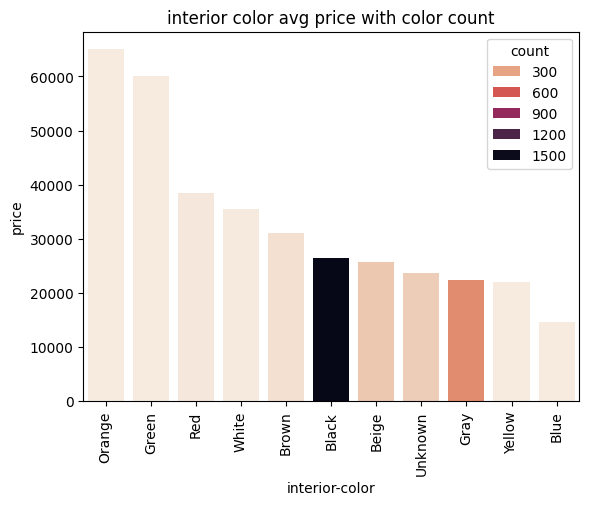

In [34]:
# groupby interior color and aggregate by finding the mean price
# we sort index of both the dataframes in_df and df_clean so that their rows match up correctly when joining them
in_df = df_clean.groupby('interior-color')['price'].mean().sort_values(ascending=False).to_frame().sort_index()

# add the count column
in_df['count'] = df_clean['interior-color'].value_counts().to_frame().sort_index()

sns.barplot(
    x="interior-color", y="price", 
    data=in_df.sort_values(by="price", ascending=False), 
    # rocket_r is the predefined magma color palette reversed
    hue="count", palette=sns.color_palette("rocket_r", as_cmap=True) # as_cmap is "as continuous color map"   
)

plt.title("interior color avg price with color count");
plt.xticks(rotation=90);

Let's also check how often these colors occur in our dataset.

**White** and **Black** are the most **common exterior colors**. **Black** and **Grey** are the **most common interior colors**.

From the count colors, we can infer that since the colors like <span style="color:orange">**Orange**</span> and <span style="color:Green">**Green**</span> have a **very low**<span>&darr;</span> count, they **cost more**<span>&uarr;</span> and since **Black** is a **common** color<span>&uarr;</span> so it comes at a **lower** price<span>&darr;</span>.

# Preprocessing

Let's start preprocessing the data!

In [35]:
# import StandardScaler, QuantileScaler, and One Hot Encoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder
# import ColumnTransformer to combine scaling and encoding
from sklearn.compose import ColumnTransformer
# import Pipeline
from sklearn.pipeline import Pipeline
# import train_test_split
from sklearn.model_selection import train_test_split

# a copy of our dataframe
df_final = df_removed_outliers_by_price.copy()

# df_final

# features: make, model, year, miles, exterior-color. interior-color, accidents-reported, and num-of-owners
X = df_final.drop(columns=['price'])
# labels: price
y = pd.DataFrame(df_final['price'].copy(), columns=["price"])

In [36]:
cols = ['year', 'miles', 'accidents-reported', 'num-of-owners', 'price']

before = df_final[cols].describe()

after = pd.DataFrame(StandardScaler().fit_transform(df_final[cols]), columns=cols)

print(
    "brefore:", 
    before.describe(),
    sep="\n\n"
)
print()
print(
    "after:",
    after.describe(),
    sep="\n\n"
)


brefore:

              year          miles  accidents-reported  num-of-owners  \
count     8.000000       8.000000            8.000000       8.000000   
mean   1789.780285   66764.503532          277.485960     278.671380   
std     725.120424  100038.446644          782.471704     781.994531   
min       3.432887      25.000000            0.000000       0.852074   
25%    2012.750000   19299.750000            0.000000       1.000000   
50%    2019.404697   38865.186327            0.144535       1.259485   
75%    2021.750000   55975.616701            1.698958       3.500000   
max    2214.000000  307292.000000         2214.000000    2214.000000   

              price  
count      8.000000  
mean   20187.086914  
std    15732.046978  
min     2214.000000  
25%     8147.753022  
50%    20420.625000  
75%    25618.080962  
max    50491.000000  

after:

               year         miles  accidents-reported  num-of-owners  \
count  2.214000e+03  2.214000e+03        2.214000e+03   2.2140

A look at the effects of the **StandardScaler** to scale our data.

In [37]:
cols = ['year', 'miles', 'accidents-reported', 'num-of-owners', 'price']

before = df_final[cols].describe()

after = pd.DataFrame(QuantileTransformer().fit_transform(df_final[cols]), columns=cols)

print(
    "brefore:", 
    before.describe(),
    sep="\n\n"
)
print()
print(
    "after:",
    after.describe(),
    sep="\n\n"
)

brefore:

              year          miles  accidents-reported  num-of-owners  \
count     8.000000       8.000000            8.000000       8.000000   
mean   1789.780285   66764.503532          277.485960     278.671380   
std     725.120424  100038.446644          782.471704     781.994531   
min       3.432887      25.000000            0.000000       0.852074   
25%    2012.750000   19299.750000            0.000000       1.000000   
50%    2019.404697   38865.186327            0.144535       1.259485   
75%    2021.750000   55975.616701            1.698958       3.500000   
max    2214.000000  307292.000000         2214.000000    2214.000000   

              price  
count      8.000000  
mean   20187.086914  
std    15732.046978  
min     2214.000000  
25%     8147.753022  
50%    20420.625000  
75%    25618.080962  
max    50491.000000  

after:

              year        miles  accidents-reported  num-of-owners  \
count  2214.000000  2214.000000         2214.000000    2214.0000

Above we can see that the QuantileTransformer gives us a more easier scale to work with by avoding negative values

Correltion before the QuantileTransformer

In [38]:
corr = before.corr()

abs(corr["price"]).sort_values(ascending=False)

price                 1.000000
miles                 0.892850
accidents-reported    0.460097
num-of-owners         0.459248
year                  0.234404
Name: price, dtype: float64

Correltion after the QuantileTransformer

In [39]:
# use the correlation method to see the relation between numerical variables
corr = after.corr()

abs(corr['price']).sort_values(ascending=False)

price                 1.000000
miles                 0.647329
year                  0.582497
num-of-owners         0.393231
accidents-reported    0.213438
Name: price, dtype: float64

Above we can notice that the effect of **miles** and **accidents-reported** has **decreased** and the effect of **year** and **num-of-owners** has significantly **increased**.

In [40]:
import numpy as np
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# imp.fit_transform(X)

## Preprocessor

In [41]:
# Define the pipeline for numerical columns
num_pipeline = Pipeline(steps=[
    ('impute_num', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scale', QuantileTransformer())
])

# Define the pipeline for categorical columns
cat_pipeline = Pipeline(steps=[
    ('impute_cat', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# we use the ColumnTransformer to scale and encode
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, ['year', 'miles', 'accidents-reported', 'num-of-owners']),
        ('cat', cat_pipeline, ['make', 'model', 'exterior-color', 'interior-color']),
    ], remainder="passthrough"
)

# we use the ColumnTransformer to scale and encode
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("impute_num", SimpleImputer(missing_values=np.nan, strategy='median'), ['year', 'miles', 'accidents-reported', 'num-of-owners']),
#         ("impute_cat", SimpleImputer(missing_values=np.nan, strategy='most_frequent'), ['make', 'model', 'exterior-color', 'interior-color']),
#         # categorical columns encoded using the OneHotEncoder
#         ("cat", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),  ['make', 'model', 'exterior-color', 'interior-color']),
#         # numerical columns scaled using the QuantileTransformer
#         ("num", QuantileTransformer(), ['year', 'miles', 'accidents-reported', 'num-of-owners']),
#     ]
# )
# df_final.columns
# fit the data
# X_transformed = preprocessor.fit_transform(X)
# y_transformed = ColumnTransformer(transformers=[ ('num', QuantileTransformer(), ['price']) ]).fit_transform(y)

# ML Pipeline

In [42]:
# split the data into Train and Test datasets with the test_size being 20% of the original dataset
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

# import models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error, mean_gamma_deviance, mean_poisson_deviance
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LogisticRegression

# Contruct our pipline
RFR = Pipeline([
    ("preprocessor", preprocessor),
    # The “random” in Random Forest comes from this process of randomly selecting a subset of features for consideration at each split
    ("model", RandomForestRegressor(random_state=5))
])

KNN = Pipeline([
    ("preprocessor", preprocessor),
    ("model", KNeighborsRegressor())
])


## GridSearch

In [43]:
forest_model = GridSearchCV(
    estimator=RFR,
    param_grid={
        'model__bootstrap': [True, False],
        # mesure the quality of a split
        'model__criterion': ['friedman_mse', 'squared_error', 'poisson'],
        # 'model__max_depth': [2, 4],
        # max_features: It decides how many features each tree in the RF considers at each split
        'model__max_features': [1, 2, 3, 4, 5, 6, 7],
        # 'model__min_samples_leaf':[1,2,3],
        # 'model__min_samples_split': [2,5],
        'model__n_estimators': [int(x) for x in np.linspace(10, 80, 10)],
    },
    verbose=2,
    n_jobs=4,
    scoring={"r2_score": make_scorer(r2_score), "mean_gamma_deviance": make_scorer(mean_gamma_deviance)},
    # so that our model is refit with the best params
    refit="mean_gamma_deviance",
    # refit=True,
    cv=3
)

knn_model = GridSearchCV(
    estimator=KNN,
    # max_features: It decides how many features each tree in the RF considers at each split
    param_grid={
        'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'model__weights': ['uniform', 'distance'],
    },
    verbose=2,
    n_jobs=4,
    scoring={"r2_score": make_scorer(r2_score), "mean_gamma_deviance": make_scorer(mean_gamma_deviance)},
    # so that our model is refit with the best params
    refit="r2_score",
    # so that our model is refit with the best params
    # refit=True,
    cv=3
)

# RFR.get_params()
# KNN.get_params()

# Model Training

## RandomForestRegressor

In [44]:
forest_model.fit(X_tr, np.ravel(y_tr))

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


[CV] END model__bootstrap=True, model__criterion=friedman_mse, model__max_features=1, model__n_estimators=10; total time=   0.1s
[CV] END model__bootstrap=True, model__criterion=friedman_mse, model__max_features=1, model__n_estimators=10; total time=   0.1s
[CV] END model__bootstrap=True, model__criterion=friedman_mse, model__max_features=1, model__n_estimators=10; total time=   0.1s
[CV] END model__bootstrap=True, model__criterion=friedman_mse, model__max_features=1, model__n_estimators=17; total time=   0.1s
[CV] END model__bootstrap=True, model__criterion=friedman_mse, model__max_features=1, model__n_estimators=17; total time=   0.1s
[CV] END model__bootstrap=True, model__criterion=friedman_mse, model__max_features=1, model__n_estimators=17; total time=   0.1s
[CV] END model__bootstrap=True, model__criterion=friedman_mse, model__max_features=1, model__n_estimators=25; total time=   0.1s
[CV] END model__bootstrap=True, model__criterion=friedman_mse, model__max_features=1, model__n_es

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          QuantileTransformer())]),
                                                                         ['year',
                                                                          'miles',
                                                                          'accidents-reported',
                                                                          'num-of-owners']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent...
                                        RandomForestRegressor(random_state=5))]),
             n_jobs=4,
             param_grid={'model__bootstrap': [True, False],
                         'model__criterion': ['friedman_mse', 'squared_error',
                                              'poisson'],
                         'model__max_features': [1, 2, 3, 4, 5, 6, 7],
                         'model__n_estimators': [10, 17, 25, 33, 41, 48, 56, 64,
                                                 72, 80]},
             refit='mean_gamma_deviance',
             scoring={'mean_gamma_deviance': make_scorer(mean_gamma_deviance),
                      'r2_score': make_scorer(r2_score)},
             verbose=2)

In [45]:
forest_model.best_params_

{'model__bootstrap': True,
 'model__criterion': 'friedman_mse',
 'model__max_features': 1,
 'model__n_estimators': 10}

## KNeighborsRegressor

In [46]:
knn_model.fit(X_tr, np.ravel(y_tr))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .......model__n_neighbors=1, model__weights=uniform; total time=   0.1s
[CV] END .......model__n_neighbors=1, model__weights=uniform; total time=   0.3s
[CV] END .......model__n_neighbors=1, model__weights=uniform; total time=   0.3s
[CV] END ......model__n_neighbors=1, model__weights=distance; total time=   0.3s
[CV] END ......model__n_neighbors=1, model__weights=distance; total time=   0.3s
[CV] END ......model__n_neighbors=1, model__weights=distance; total time=   0.0s
[CV] END .......model__n_neighbors=2, model__weights=uniform; total time=   0.0s
[CV] END .......model__n_neighbors=2, model__weights=uniform; total time=   0.0s
[CV] END .......model__n_neighbors=2, model__weights=uniform; total time=   0.0s
[CV] END ......model__n_neighbors=2, model__weights=distance; total time=   0.0s
[CV] END .......model__n_neighbors=3, model__weights=uniform; total time=   0.0s
[CV] END ......model__n_neighbors=2, model__weig

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          QuantileTransformer())]),
                                                                         ['year',
                                                                          'miles',
                                                                          'accidents-reported',
                                                                          'num-of-owners']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['make',
                                                                          'model',
                                                                          'exterior-color',
                                                                          'interior-color'])])),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=4,
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__weights': ['uniform', 'distance']},
             refit='r2_score',
             scoring={'mean_gamma_deviance': make_scorer(mean_gamma_deviance),
                      'r2_score': make_scorer(r2_score)},
             verbose=2)

## Results

Score of RandomForestRegressor:

In [47]:
print("Train: ", forest_model.score(X_tr, np.ravel(y_tr)))
print("Test: ", forest_model.score(X_te, np.ravel(y_te)))

Train:  0.014718709372127464
Test:  0.07536647832934124


Score of KNearestNeighborsRegressor:

In [48]:
print("Train", knn_model.score(X_tr, np.ravel(y_tr)))
print("Test", knn_model.score(X_te, np.ravel(y_te)))

Train 0.9999999999988808
Test 0.5884078832131152


This is an overfit! ^^

In [49]:
pd.DataFrame(forest_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__bootstrap,param_model__criterion,param_model__max_features,param_model__n_estimators,params,split0_test_r2_score,...,split2_test_r2_score,mean_test_r2_score,std_test_r2_score,rank_test_r2_score,split0_test_mean_gamma_deviance,split1_test_mean_gamma_deviance,split2_test_mean_gamma_deviance,mean_test_mean_gamma_deviance,std_test_mean_gamma_deviance,rank_test_mean_gamma_deviance
0,0.048612,0.002681,0.006089,0.000549,True,friedman_mse,1,10,"{'model__bootstrap': True, 'model__criterion':...",0.628493,...,0.589481,0.618218,0.020593,420,0.066276,0.061167,0.075238,0.067560,0.005816,1
1,0.058346,0.000331,0.006762,0.000737,True,friedman_mse,1,17,"{'model__bootstrap': True, 'model__criterion':...",0.638650,...,0.640792,0.644666,0.007048,412,0.065565,0.056951,0.066604,0.063040,0.004326,7
2,0.072460,0.001010,0.007264,0.000217,True,friedman_mse,1,25,"{'model__bootstrap': True, 'model__criterion':...",0.648507,...,0.652819,0.657938,0.010438,393,0.063520,0.054658,0.065022,0.061067,0.004573,19
3,0.087027,0.000461,0.008055,0.000078,True,friedman_mse,1,33,"{'model__bootstrap': True, 'model__criterion':...",0.652312,...,0.666979,0.661984,0.006841,389,0.063224,0.055709,0.062149,0.060361,0.003318,28
4,0.100277,0.000652,0.009001,0.000043,True,friedman_mse,1,41,"{'model__bootstrap': True, 'model__criterion':...",0.651110,...,0.671235,0.662663,0.008482,386,0.063257,0.056056,0.061357,0.060223,0.003047,30


In [50]:
pd.DataFrame(knn_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,param_model__weights,params,split0_test_r2_score,split1_test_r2_score,split2_test_r2_score,mean_test_r2_score,std_test_r2_score,rank_test_r2_score,split0_test_mean_gamma_deviance,split1_test_mean_gamma_deviance,split2_test_mean_gamma_deviance,mean_test_mean_gamma_deviance,std_test_mean_gamma_deviance,rank_test_mean_gamma_deviance
0,0.026135,0.000129,0.198090,0.108877,1,uniform,"{'model__n_neighbors': 1, 'model__weights': 'u...",0.279788,0.327156,0.312172,0.306372,0.019768,19,0.130878,0.127012,0.122205,0.126698,0.003548,2
1,0.028832,0.004939,0.174393,0.113083,1,distance,"{'model__n_neighbors': 1, 'model__weights': 'd...",0.279788,0.327156,0.312172,0.306372,0.019768,19,0.130878,0.127012,0.122205,0.126698,0.003548,1
2,0.027073,0.000769,0.014556,0.001625,2,uniform,"{'model__n_neighbors': 2, 'model__weights': 'u...",0.477881,0.427284,0.458557,0.454574,0.020847,18,0.088954,0.097849,0.095752,0.094185,0.003797,3
3,0.026772,0.000534,0.015326,0.003037,2,distance,"{'model__n_neighbors': 2, 'model__weights': 'd...",0.472972,0.450341,0.477020,0.466778,0.011740,17,0.090134,0.094954,0.093445,0.092844,0.002013,4
4,0.026678,0.000695,0.013349,0.000400,3,uniform,"{'model__n_neighbors': 3, 'model__weights': 'u...",0.492636,0.466259,0.491293,0.483396,0.012130,16,0.084682,0.088388,0.087627,0.086899,0.001598,7


Text(0, 0.5, 'actual')

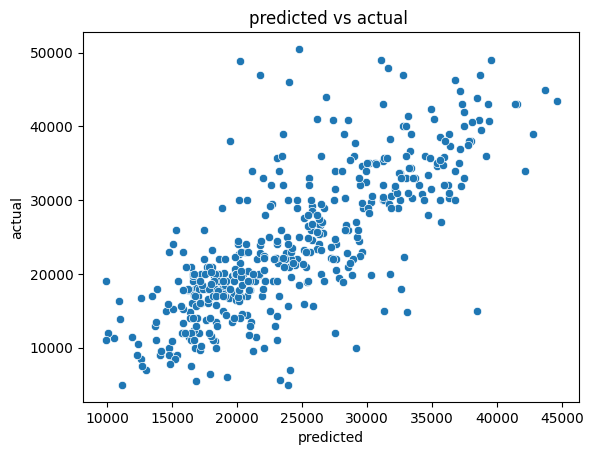

In [51]:
sns.scatterplot(x=knn_model.predict(X_te), y=np.ravel(y_te))
plt.title("predicted vs actual ")
plt.xlabel("predicted")
plt.ylabel("actual")

In [52]:
pd.DataFrame(forest_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__bootstrap,param_model__criterion,param_model__max_features,param_model__n_estimators,params,split0_test_r2_score,...,split2_test_r2_score,mean_test_r2_score,std_test_r2_score,rank_test_r2_score,split0_test_mean_gamma_deviance,split1_test_mean_gamma_deviance,split2_test_mean_gamma_deviance,mean_test_mean_gamma_deviance,std_test_mean_gamma_deviance,rank_test_mean_gamma_deviance
0,0.048612,0.002681,0.006089,0.000549,True,friedman_mse,1,10,"{'model__bootstrap': True, 'model__criterion':...",0.628493,...,0.589481,0.618218,0.020593,420,0.066276,0.061167,0.075238,0.067560,0.005816,1
1,0.058346,0.000331,0.006762,0.000737,True,friedman_mse,1,17,"{'model__bootstrap': True, 'model__criterion':...",0.638650,...,0.640792,0.644666,0.007048,412,0.065565,0.056951,0.066604,0.063040,0.004326,7
2,0.072460,0.001010,0.007264,0.000217,True,friedman_mse,1,25,"{'model__bootstrap': True, 'model__criterion':...",0.648507,...,0.652819,0.657938,0.010438,393,0.063520,0.054658,0.065022,0.061067,0.004573,19
3,0.087027,0.000461,0.008055,0.000078,True,friedman_mse,1,33,"{'model__bootstrap': True, 'model__criterion':...",0.652312,...,0.666979,0.661984,0.006841,389,0.063224,0.055709,0.062149,0.060361,0.003318,28
4,0.100277,0.000652,0.009001,0.000043,True,friedman_mse,1,41,"{'model__bootstrap': True, 'model__criterion':...",0.651110,...,0.671235,0.662663,0.008482,386,0.063257,0.056056,0.061357,0.060223,0.003047,30


Most Accurate Model we have:

Text(0, 0.5, 'actual')

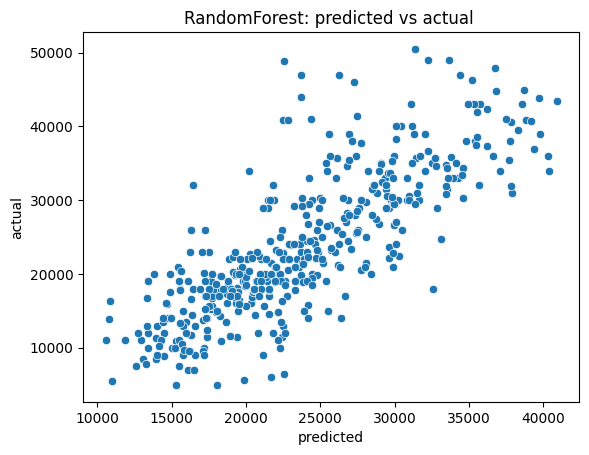

In [53]:
sns.scatterplot(x=forest_model.predict(X_te), y=np.ravel(y_te))
plt.title("RandomForest: predicted vs actual ")
plt.xlabel("predicted")
plt.ylabel("actual")

## Sample Predictions

In [54]:
# This is my car, actual price is around 11k
myCar = pd.DataFrame(
    {   "make": "Toyota",
        "model": "Corolla",
        "year": 2015,
        "miles": 90000,
        "exterior-color": "Black",
        "interior-color": "Gray",
        "accidents-reported": 2,
        "num-of-owners": 3
    }, 
    index=[0]
)

# cars I found online, for this one the actual price is 24k
merc = pd.DataFrame(
    {   "make": "Mercedes-Benz",
        "model": "S-Class",
        "year": 2014,
        "miles": 89000,
        "exterior-color": "White",
        "interior-color": "Beige",
        "accidents-reported": 0,
        "num-of-owners": 1
    }, 
    index=[0]
)

# This one is 17K
ford = pd.DataFrame(
    {   "make": "Ford",
        "model": "F-150",
        "year": 2013,
        "miles": 121000,
        "exterior-color": "Gray",
        "interior-color": "Gray",
        "accidents-reported": 0,
        "num-of-owners": 1
    }, 
    index=[0]
)

print(
    f"KNearestNeighbors: Your car resale price is: ${round(knn_model.predict(X=myCar)[0], 2)}"
)

print(
    f"RandomForestRegressor: Your car resale price is: ${round(forest_model.predict(X=myCar)[0], 2)}"
)

KNearestNeighbors: Your car resale price is: $11504.01
RandomForestRegressor: Your car resale price is: $12726.6


# End